# Bangalore House Price Prediction

Predicting the price of house given its features/characteristics.

The dataset is taken from kaggle - https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data


**Objective:**
To clean the data, then apply feature engineering and selection techniques to the data.Then modelling and deploy the model in web using python Flask as web server.

The main aim is to predict the price which is dependent variable and other are features/independent variables

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# Loading the data

house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Bengaluru_House_Data.csv')
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Thus data seems to be messy, cleaning the data is very important before modelling. Let's start with pre-processing step.

## Data Analysis and Pre processing

In [3]:
house_data.shape

(13320, 9)

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


> From above, we infer that there are 6 features which is of string type and 2 features of numerical type

In [5]:
# To the count for unique area type 

house_data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
house_data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
16-Nov               1
15-Jun               1
16-Jan               1
15-Dec               1
Name: availability, Length: 81, dtype: int64

In [7]:
house_data['location'].value_counts()

Whitefield                                     540
Sarjapur  Road                                 399
Electronic City                                302
Kanakpura Road                                 273
Thanisandra                                    234
                                              ... 
Annapoorneshwari Layout, JP nagar 7th phase      1
1 Giri Nagar                                     1
Viviani Road                                     1
Chikkabidarakallu                                1
B K Nagar                                        1
Name: location, Length: 1305, dtype: int64

In [8]:
house_data['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
K tlete     1
Kelia R     1
Niine J     1
KPhtsei     1
TealeRo     1
Name: society, Length: 2688, dtype: int64

In [9]:
house_data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
14 BHK           1
12 Bedroom       1
27 BHK           1
18 Bedroom       1
19 BHK           1
16 BHK           1
43 Bedroom       1
13 BHK           1
Name: size, dtype: int64

**From above, it is clear that there are more number of unique categories in 'Availability', 'location' and 'society' features, which will be difficult to process for the model. hence we will drop the features**


In [10]:
df2 = house_data.drop(['availability','society','area_type'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
# To check missing values

df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

There are missing values in size, No of bathroom and No of balcony features in the dataset. So we will perform Imputation process

In [12]:
df2['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [13]:
df2['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
40.0       1
18.0       1
27.0       1
15.0       1
Name: bath, dtype: int64

In [14]:
# Let's impute the balcony and bath feature using mode imputation

df2['balcony'].fillna(value=2.0,inplace=True)
df2['bath'].fillna(value=2.0,inplace=True)

In [15]:
# Now dropping remaining missing values

df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [16]:
df2.shape

(13303, 6)

In Size feature, we need only number of rooms but there is extra text present with the number. Let's try to eliminate the text

In [17]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df2['Bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0])) # spliting each text and getting the first index
df2.head()

,location,size,total_sqft,bath,balcony,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [19]:
df2[df2.Bedroom > 20]

,location,size,total_sqft,bath,balcony,price,Bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


**Note: As we see clearly there has been mistake in data, as 43 bedroom flat has only 2400 Sqft which is not at all possible.
May consultinh with SME will be better idea, in general 1 bedroom has to be atleast 400 to 500 sqft**


In [20]:
# Now let's check at total_sqft feature
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

So there is values which is available in ranges, let's check the whole column to check how many values are present like these

In [21]:
def is_float(x):
    """
    If number is float, it returns true otherwise False.
    """
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df2[~ df2['total_sqft'].apply(is_float)].head(15) # To get the records where sqft values is in ranges

,location,size,total_sqft,bath,balcony,price,Bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


From above it is inferred that, values are available in square meter, Perch etc.. So there is lot of cleaning to be done.
Here we will write a function which gives average value for the range type and ignore the other types like sq.meter, perch etc..

In [23]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None
    
    

In [24]:
# to check the above func
convert_sqft_to_num('4534')

4534.0

In [25]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,balcony,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [26]:
df3.isnull().sum() # since our function returns Nan value for some of sqft values

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
Bedroom        0
dtype: int64

### Feature Engineering and outliers removal

In [27]:
#  creating new feature price per sqft column
df4 = df3.copy()
df4['price_per_sqft'] = df4['price'] * 100000 / df4['total_sqft'] # since prices are in lakhs
df4.head()

,location,size,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
# Now lets clean location column
len(df4['location'].unique())

1304

In [29]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

*So we are gonna add location named "Other" which will have records with houses count less than 10 for that particular location.*

In [30]:
len(location_stats[location_stats <=10])

1052

In [31]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
# Adding the category as other

df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [33]:
df4.head(10)

,location,size,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [34]:
df4[df4.total_sqft / df4.Bedroom < 300] # getting records where 1 bedroom size is less than 300 sq.ft

,location,size,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,2.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


**Note: From above we can infer that there are around 744 data points which are wrongly observed/entered. Need to be taken care of these outliers before modelling**

In [35]:
# Removing the above outliers by filtering the records

df5 = df4[~ (df4.total_sqft / df4.Bedroom < 300)]
df5.shape

(12559, 8)

In [36]:
# checking price per sq.ft for any outlier

df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we can see there is min price of 267 sq.ft which is not at all possible in Bangalore and max orice of 17k which may be possible. So we need to get rid of outliers with respect to location by calculating mean and std and removing the records which have 2 or 3 S.D from mean

In [37]:
# Example for griupby func
for i,j in df5.groupby('location'):
    print(i)
    print(j)
    break

1st Block Jayanagar
                  location       size  total_sqft  bath  balcony  price  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0      1.0  428.0   
848    1st Block Jayanagar      3 BHK      1630.0   3.0      2.0  194.0   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0      3.0  235.0   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0      2.0  450.0   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0      2.0   60.0   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0      0.0  130.0   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0      2.0  148.0   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0      0.0  413.0   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0      2.0  115.0   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0      2.0  368.0   

       Bedroom  price_per_sqft  
210          4    15017.543860  
848          3    11901.840491  
2152         3    12533.333333  
2355         4    1875

In [38]:
def remove_pricepersqft_outliers(df):
    """
    Removes outliers where price per sqft value is +/- 2 S.D from mean
    for each unique location and creating new dataframe after removing outliers
    """
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >= (m-2*std)) & (subdf.price_per_sqft <= (m+2*std))]
        
        #adding only values which are within 2 S.D
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out
    
    
df6 = remove_pricepersqft_outliers(df5)
df6.shape

(11991, 8)

### Data visualization

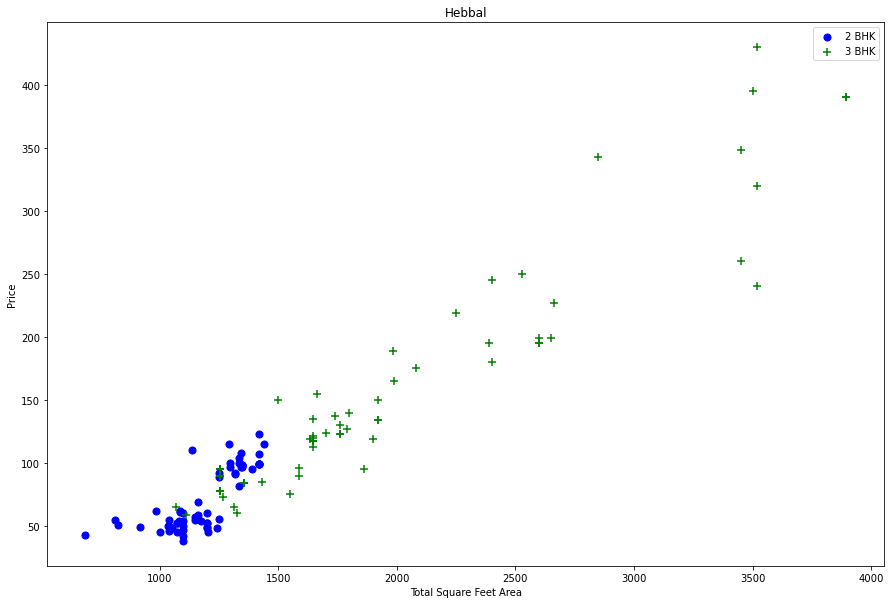

In [39]:
def plot_scatter_chart(df,location):
    """
    Compares price of 2 BHK and 3 BHK flats
    at same location with respect to toatl sqft
    """
    bhk2 = df[(df.location== location) & (df.Bedroom==2)]
    bhk3 = df[(df.location== location) & (df.Bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    
plot_scatter_chart(df6,'Hebbal')

> From above plot, it is clear that price of 2 BHK is higher than 3 BHK for some houses in same location like Rajaji Nagar, Hebbal etc..

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [40]:
def remove_bhk_outliers(df):
    """
    Remove the records(outliers) where higher bedroom flat price is less than mean price of lower bedroom
    for each unique location
    """
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('Bedroom'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count'] > 5: # It just checks whether previos bedroom has atleast 5 records to check mean price
                
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                # It includes the index of the record where higher bedroom is price is less than mean price of lower bedroom
                
        
        
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(8459, 8)

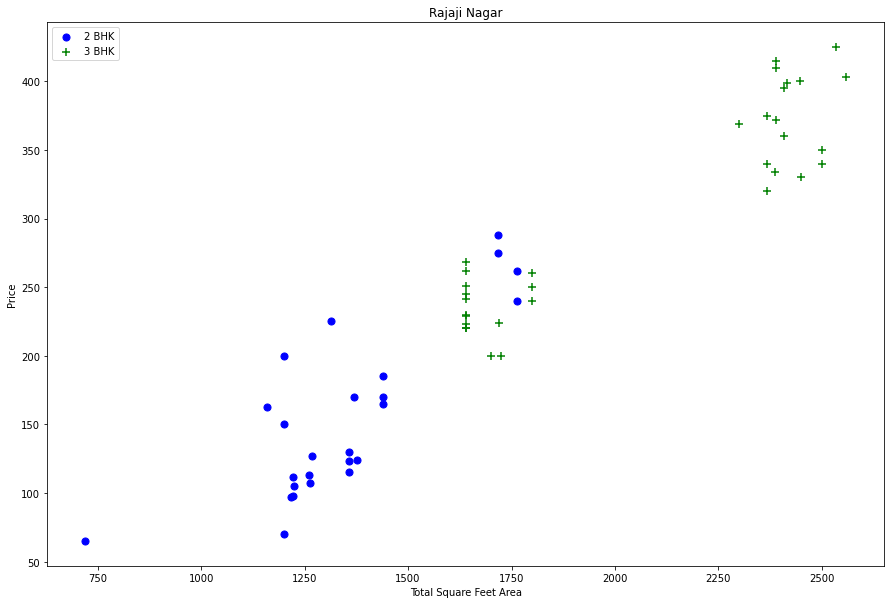

In [41]:
# Let's plot again the above chart to check 

def plot_scatter_chart(df,location):
    """
    Compares price of 2 BHK and 3 BHK flats
    at same location with respect to toatl sqft
    """
    bhk2 = df[(df.location== location) & (df.Bedroom==2)]
    bhk3 = df[(df.location== location) & (df.Bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    
plot_scatter_chart(df7,'Rajaji Nagar')

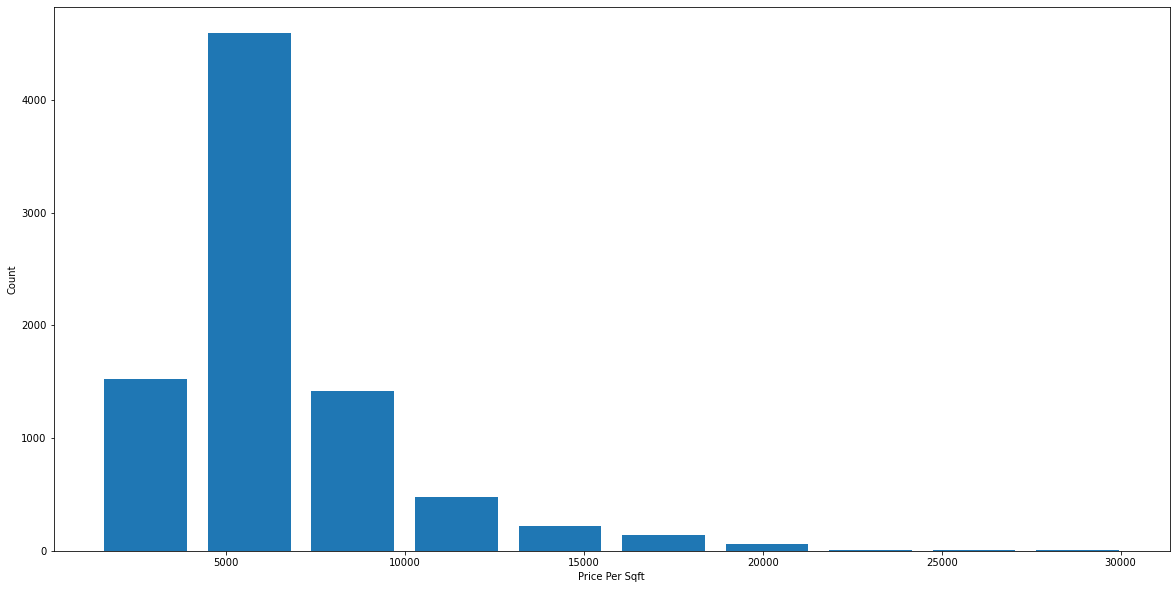

In [42]:
# Plotting distribution of price per sqft feature

plt.figure(figsize=(20,10))
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')
plt.show()

In [43]:
# checking bathroom feature
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  9., 10., 12., 14., 16.,
       13.])

In [44]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
6331,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
9734,other,9 Bedroom,3300.0,14.0,2.0,500.0,9,15151.515152
10199,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
10992,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
11350,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


> By considering with SME, we got to know that particular number of BHK flats can have atmost bedroom + 2 bathrooms, So we will eliminate the outliers which does not satify this condition

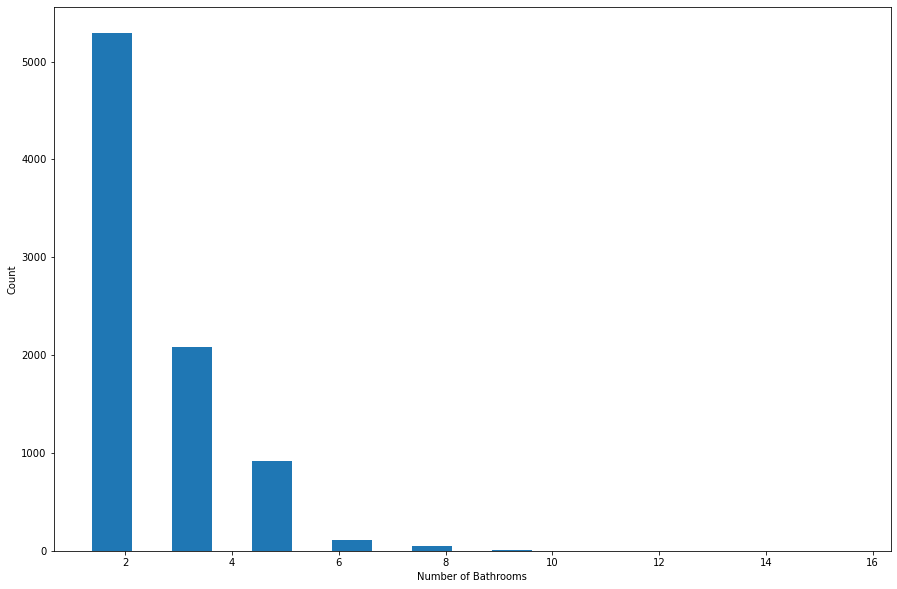

In [45]:
plt.hist(df7.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

In [46]:
df7[df7.bath > df7.Bedroom + 2] # To get rid out of the outliers 

,location,size,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
1911,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6278,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
8123,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
9734,other,9 Bedroom,3300.0,14.0,2.0,500.0,9,15151.515152


In [47]:
df8 = df7[df7.bath < (df7.Bedroom + 2)]
df8.shape

(8353, 8)

**Now we will drop the size feature since we have bedroom feature as replacement adn price_per_sqft column since we used it only for outlier detection**


In [48]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,balcony,price,Bedroom
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2


#### Converting string/categorical types to numeric (one hot encoding)

In [49]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:

df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df10 = df10.drop('location',axis='columns')
df10.head(2)

,total_sqft,bath,balcony,price,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling Phase

In [52]:
# setting X and y as independent and dependent var
X = df10.drop('price',axis=1)
y = df10[['price']]

X.shape, y.shape

((8353, 245), (8353, 1))

In [53]:
# SPlitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train.shape, y_test.shape

((6682, 245), (1671, 1))

In [54]:
X_train.head()

,total_sqft,bath,balcony,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2273.0,3.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1172.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1565.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1207.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,849.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.7740093303551487

In [56]:
# Applying k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
print('Cross validated score for Linear Regression model: ',np.mean(cross_val_score(LinearRegression(),X,y,cv=cv)))

Cross validated score for Linear Regression model:  0.7589827527900997


In [57]:
# trying hyper parameter tuning using gridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
            
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1,2,3,4]
               }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'max_depth': [3,5,8,10],
                'splitter': ['best','random']
            }
        },
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.753229,{'normalize': True}
1,Ridge,0.754372,{'alpha': 1}
2,decision_tree,0.730044,"{'criterion': 'friedman_mse', 'max_depth': 10,..."


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

<ipython-input-58-55ae4ac1eedf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.808736907516578

In [59]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
print('Cross validated score for Random Forest model: ',np.mean(cross_val_score(RandomForestRegressor(n_estimators=200),
                                                                                    X,y,cv=cv)))


C:\Users\arunkumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\arunkumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\arunkumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\arunkumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A co

Cross validated score for Random Forest model:  0.7631552342703772


In [60]:
# Saving the model in pickle format
import pickle
with open('bangalore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_model,f)

In [61]:
# Saving the location data as columns in json format

import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [62]:

def predict_price(location,total_sqft,bath,balcony,Bedroom):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = balcony
    x[3] = Bedroom 
    if loc_index >= 0:
        x[loc_index] = 1

    return np.round(lr_model.predict([x])[0][0],2) 

In [63]:
predict_price('Rajaji Nagar',1500,2,2,2)

248.0